# EDA

The following documents is the first and general EDA (Examinating Data Analys) of the 17 datasets listed below:
- Alternative Fuel Vehicles US.csv
- Electric and Alternative Fuel Charging Stations.csv
- ElectricCarData_Norm.csv
- ElectricCarData_Clean.csv
- yellow_tripdata_2022-06.parquet
- yellow_tripdata_2023-06.parquet 
- fhv_tripdata_2022-06.parquet
- fhv_tripdata_2023-06.parquet
- green_tripdata_2022-06.parquet
- green_tripdata_2023-06.parquet
- fhvhv_tripdata_2022-06.parquet
- fhvhv_tripdata_2023-06.parquet
- Light Duty Vehicles.csv
- data_reports_monthly.csv
- taxi+_zone_lookup.csv
- taxi_zones.dbf
- Vehicle Fuel Economy Data.csv

## Libraries Used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import math
from sklearn.ensemble import IsolationForest
from dbfread import DBF
import warnings
warnings.filterwarnings("ignore")


Items to evaluate from every dataset:

- Diccionary
- Shape and Dimention: Rows and columns quantity
- Type of data in columns.
- Missing values
- Describe
- Outliers

## ALTERNATIVE FUEL VEHICLES (US)
### Alternative Fuel Vehicles US.csv
Importing the dataset as a DataFrame

In [2]:
alternative_fuel_vehicles = pd.read_csv('Datasets\Alternative Fuel Vehicles US.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<b>Dataframe descripcion :</b> The 'alternative_fuel_vehicles' dataset is a comprehensive collection of information about vehicles that use alternative fuels. It encompasses a wide range of vehicle models and manufacturers, providing valuable insights into the world of environmentally-friendly transportation. 

#### Data Dictionary

- **Category:** Category or type of the vehicle. General body style or form of the vehicle.
- **Model:** Model name of the vehicle.
- **Model Year:** Year when the vehicle model was manufactured.
- **Manufacturer:** Name of the company or manufacturer that produced the vehicle.
- **Fuel:** Type of alternative fuel the vehicle uses.
- **All-Electric Range:** Maximum range of the vehicle when operating in all-electric mode (in miles).
- **PHEV Total Range:** Total range of a Plug-In Hybrid Electric Vehicle (PHEV) in miles, which includes both electric and conventional fuel range.
- **Alternative Fuel Economy City:** Estimated fuel economy for the vehicle when driving in city conditions using the alternative fuel source (e.g., miles per gallon).
- **Alternative Fuel Economy Highway:** Estimated fuel economy for the vehicle when driving on the highway using the alternative fuel source (e.g., miles per gallon).
- **Alternative Fuel Economy Combined:** Estimated combined fuel economy for the vehicle, which may consider both city and highway driving (e.g., miles per gallon).
- **Conventional Fuel Economy City:** Estimated fuel economy for the vehicle when using conventional fuel (non-alternative fuel) in city conditions (e.g., miles per gallon).
- **Conventional Fuel Economy Highway:** Estimated fuel economy for the vehicle when using conventional fuel on the highway (e.g., miles per gallon).
- **Conventional Fuel Economy Combined:** Estimated combined fuel economy for the vehicle when using conventional fuel (e.g., miles per gallon).
- **Transmission Type:** Type of transmission used in the vehicle.
- **Transmission Make:** Manufacturer or brand of the transmission, if applicable.
- **Engine Type:** Type of engine used in the vehicle.
- **Engine Size:** Size or displacement of the engine, often expressed in liters.
- **Engine Cylinder Count:** Number of cylinders in the vehicle's engine.
- **Number of Passengers:** Maximum number of passengers the vehicle can accommodate.
- **Heavy-Duty Power System:** Indicates if the vehicle has a heavy-duty power system.
- **Notes:** Additional notes or information about the vehicle, if available.
- **Drivetrain:** Type of drivetrain, such as "AWD" (All-Wheel Drive) or "FWD" (Front-Wheel Drive).

In [4]:
alternative_fuel_vehicles.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [5]:
alternative_fuel_vehicles.tail()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
877,Street Sweeper,HSP,NaN,TYMCO,CNG - Compressed Natural Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cummins Westport L9N 8.9L Near Zero,NaN,NaN
878,Step Van,(various models),NaN,Utilimaster,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,According to manufacturer: Various platforms a...,NaN
879,Transit Bus,CX45E,NaN,Van Hool,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up to 56,Siemens ELFA2 Electric Drive System 360kW,According to manufacturer: 676 kWh battery sto...,NaN
880,Tractor,VNR Electric - Class 8,NaN,Volvo,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"According to manufacturer: 340kW; 455hp; 4,051...",NaN
881,Step Van,C-Series,NaN,Workhorse,Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,Workhorse Dual Axial Flux Interior Permanent M...,According to manufacturer: Up to 105 kWh batte...,NaN


### Shape and Dimension

In [6]:
alternative_fuel_vehicles.shape

(882, 22)

Number of Rows

In [7]:
num_rows = len(alternative_fuel_vehicles)
print("\nNumber of Rows:", num_rows)


Number of Rows: 882


### Data Information

Column Names and Data Types

In [8]:
column_info = alternative_fuel_vehicles.dtypes
column_info

Category                               object
Model                                  object
Model Year                            float64
Manufacturer                           object
Fuel                                   object
All-Electric Range                    float64
PHEV Total Range                      float64
Alternative Fuel Economy City         float64
Alternative Fuel Economy Highway      float64
Alternative Fuel Economy Combined     float64
Conventional Fuel Economy City        float64
Conventional Fuel Economy Highway     float64
Conventional Fuel Economy Combined    float64
Transmission Type                      object
Transmission Make                      object
Engine Type                            object
Engine Size                            object
Engine Cylinder Count                 float64
Number of Passengers                   object
Heavy-Duty Power System                object
Notes                                  object
Drivetrain                        

Unique Values

In [9]:
unique_values = alternative_fuel_vehicles.nunique()
unique_values

Category                               15
Model                                 633
Model Year                              2
Manufacturer                           81
Fuel                                   22
All-Electric Range                    110
PHEV Total Range                       25
Alternative Fuel Economy City          68
Alternative Fuel Economy Highway       66
Alternative Fuel Economy Combined      88
Conventional Fuel Economy City         43
Conventional Fuel Economy Highway      40
Conventional Fuel Economy Combined     40
Transmission Type                       4
Transmission Make                      32
Engine Type                             4
Engine Size                            92
Engine Cylinder Count                   4
Number of Passengers                   52
Heavy-Duty Power System                84
Notes                                 128
Drivetrain                              5
dtype: int64

Ducplicates

In [10]:
duplicates = alternative_fuel_vehicles[alternative_fuel_vehicles.duplicated()]
duplicates

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
506,Sedan/Wagon,E 450 4MATIC,2021.0,Mercedes-Benz,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,23.0,30.0,26.0,Auto,NaN,SI,3.0L,6.0,NaN,NaN,NaN,NaN


Missing and Null Values

In [11]:
missing_values = alternative_fuel_vehicles.isnull().sum()
missing_values

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

### Summary Statistics

In [12]:
summary_stats = alternative_fuel_vehicles.describe()
summary_stats

,Model Year,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Cylinder Count
count,594.000000,222.000000,43.000000,169.000000,169.000000,262.000000,444.000000,444.000000,444.000000,449.000000
mean,2021.538721,165.927928,450.465116,84.585799,77.591716,75.992366,25.900901,30.085586,27.261261,5.452116
std,0.498919,132.992955,93.042578,39.430696,32.735123,32.303279,10.860665,12.815653,9.803912,1.396121
min,2021.000000,8.000000,290.000000,10.000000,12.000000,11.000000,13.000000,16.000000,15.000000,3.000000
25%,2021.000000,23.000000,380.000000,71.000000,66.000000,56.000000,19.000000,24.000000,21.000000,4.000000
50%,2022.000000,203.000000,460.000000,94.000000,85.000000,76.000000,22.000000,28.000000,24.000000,6.000000
75%,2022.000000,260.000000,520.000000,115.000000,99.000000,101.000000,28.000000,33.000000,30.000000,6.000000
max,2022.000000,520.000000,640.000000,150.000000,133.000000,142.000000,59.000000,231.000000,59.000000,8.000000


Outliers


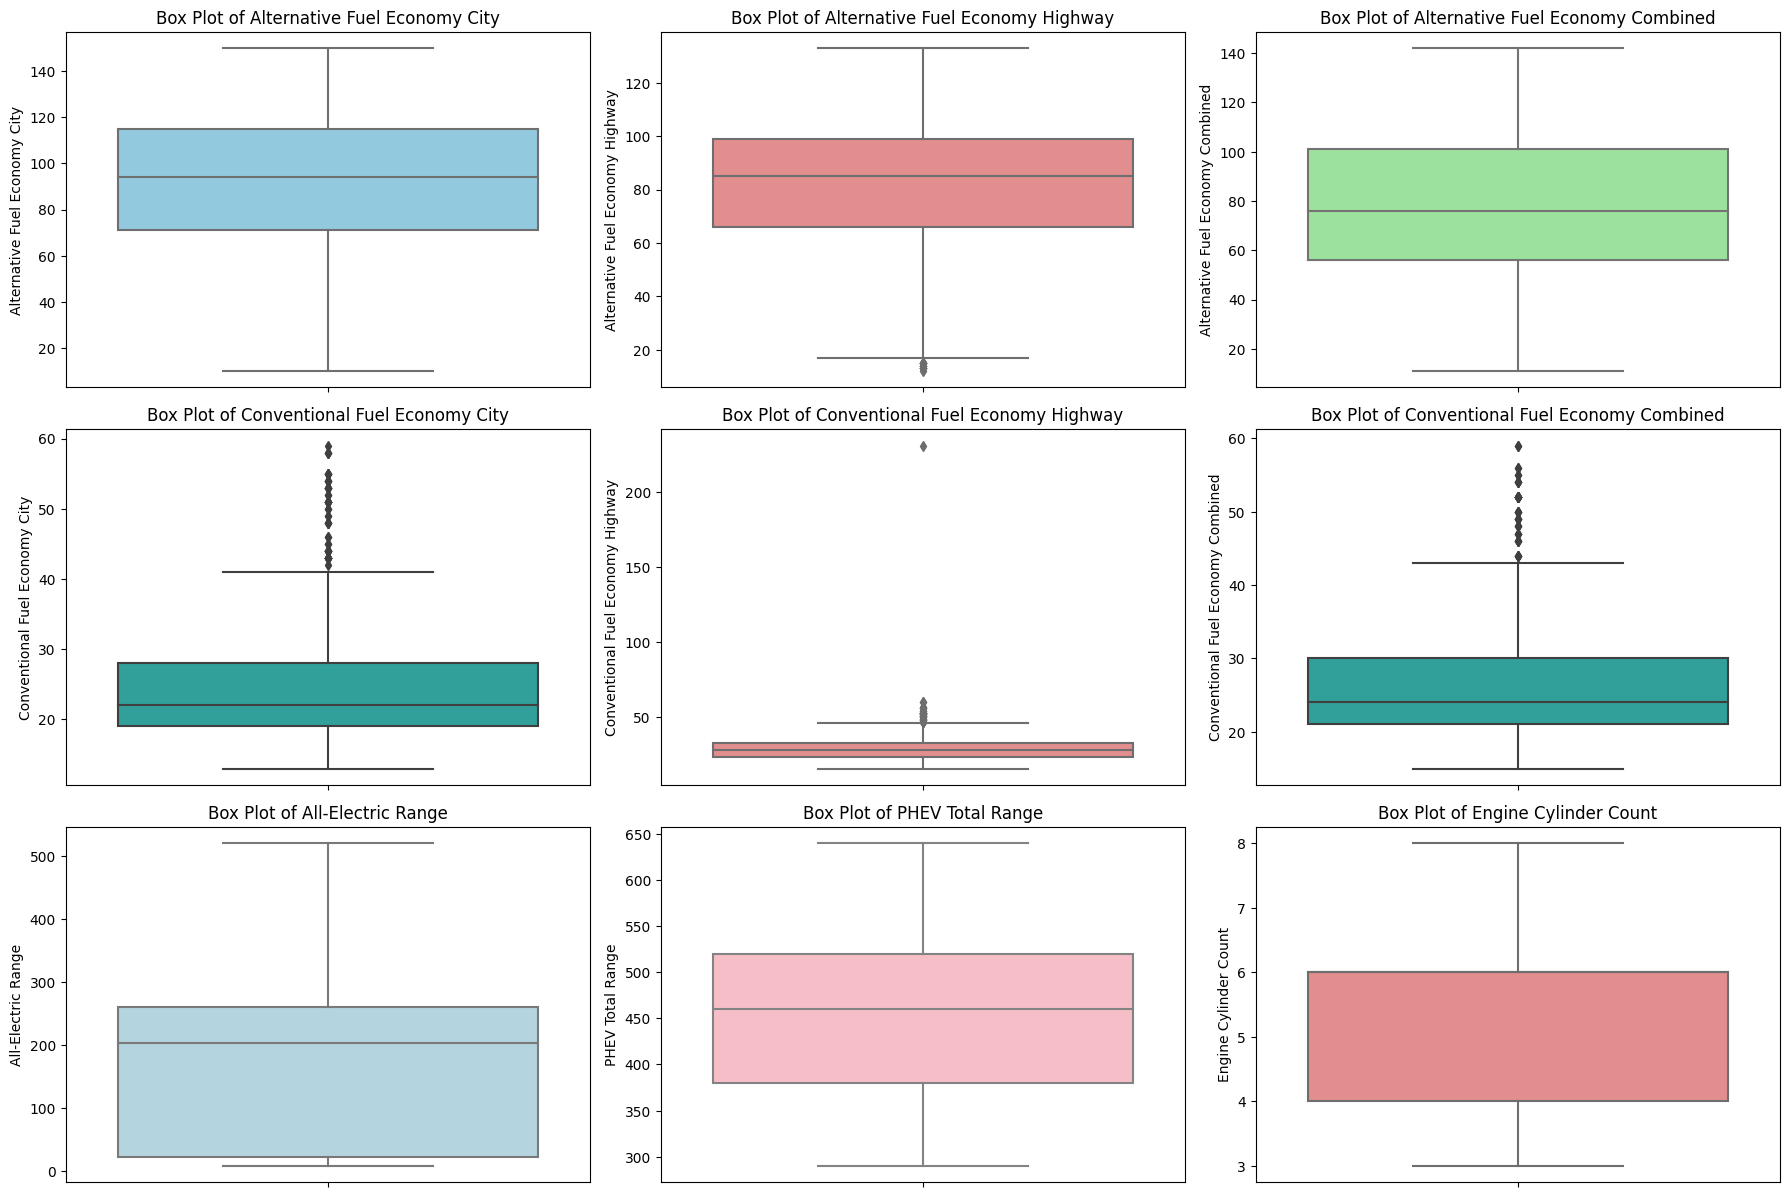

In [14]:
plt.figure(figsize=(18, 16))

# Boxplot 1
plt.subplot(4, 3, 1)
sns.boxplot(data=alternative_fuel_vehicles, y='Alternative Fuel Economy City', color='skyblue')
plt.title('Box Plot of Alternative Fuel Economy City')

# Boxplot 2
plt.subplot(4, 3, 2)
sns.boxplot(data=alternative_fuel_vehicles, y='Alternative Fuel Economy Highway', color='lightcoral')
plt.title('Box Plot of Alternative Fuel Economy Highway')

# Boxplot 3
plt.subplot(4, 3, 3)
sns.boxplot(data=alternative_fuel_vehicles, y='Alternative Fuel Economy Combined', color='lightgreen')
plt.title('Box Plot of Alternative Fuel Economy Combined')

# Boxplot 4
plt.subplot(4, 3, 4)
sns.boxplot(data=alternative_fuel_vehicles, y='Conventional Fuel Economy City', color='lightseagreen')
plt.title('Box Plot of Conventional Fuel Economy City')

# Boxplot 5
plt.subplot(4, 3, 5)
sns.boxplot(data=alternative_fuel_vehicles, y='Conventional Fuel Economy Highway', color='lightcoral')
plt.title('Box Plot of Conventional Fuel Economy Highway')

# Boxplot 6
plt.subplot(4, 3, 6)
sns.boxplot(data=alternative_fuel_vehicles, y='Conventional Fuel Economy Combined', color='lightseagreen')
plt.title('Box Plot of Conventional Fuel Economy Combined')

# Boxplot 7
plt.subplot(4, 3, 7)
sns.boxplot(data=alternative_fuel_vehicles, y='All-Electric Range', color='lightblue')
plt.title('Box Plot of All-Electric Range')

# Boxplot 8
plt.subplot(4, 3, 8)
sns.boxplot(data=alternative_fuel_vehicles, y='PHEV Total Range', color='lightpink')
plt.title('Box Plot of PHEV Total Range')

# Boxplot 9
plt.subplot(4, 3, 9)
sns.boxplot(data=alternative_fuel_vehicles, y='Engine Cylinder Count', color='lightcoral')
plt.title('Box Plot of Engine Cylinder Count')

# Boxplot 10
#plt.subplot(4, 3, 10)
#sns.boxplot(data=alternative_fuel_vehicles, y='Number of Passengers', color='lightseagreen')
#plt.title('Box Plot of Number of Passengers')

plt.tight_layout()
plt.show()

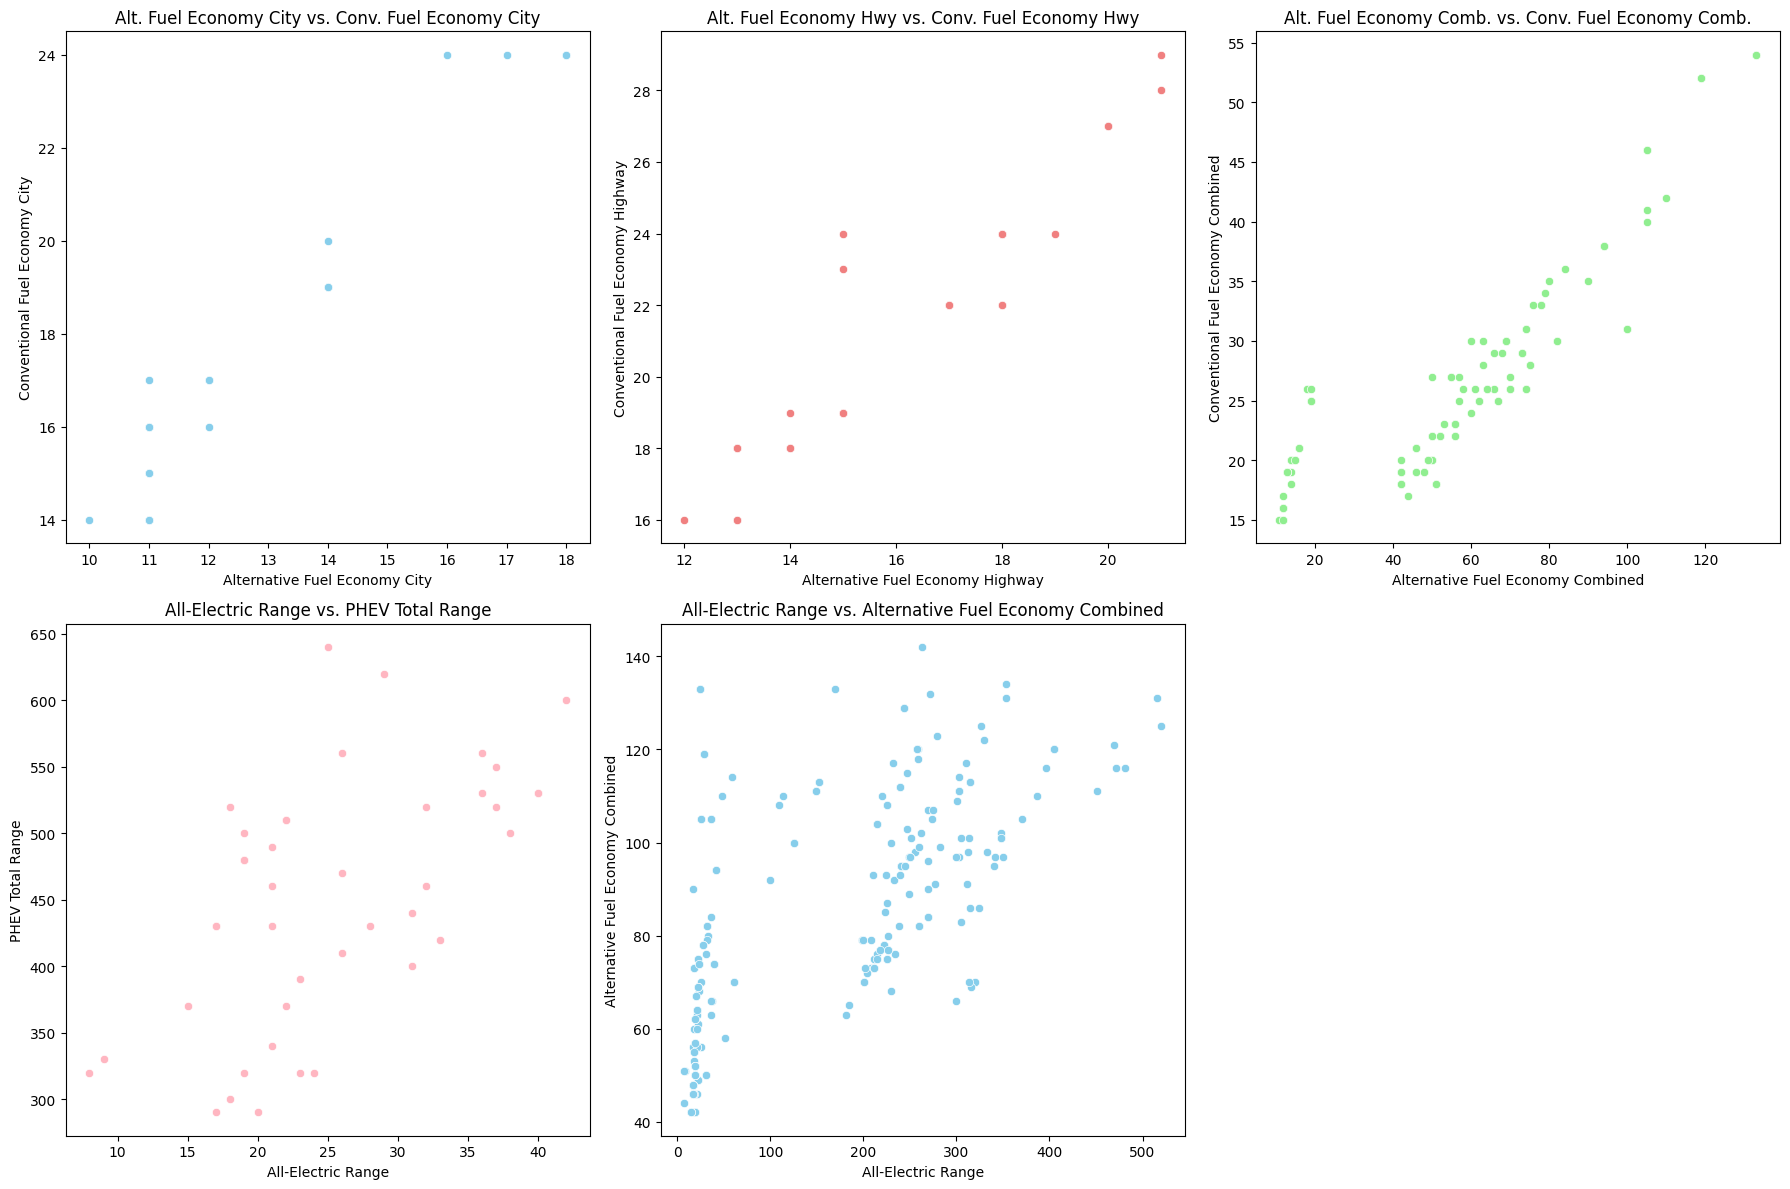

In [15]:
plt.figure(figsize=(18, 12))

# Scatterplot 1
plt.subplot(2, 3, 1)
sns.scatterplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy City', y='Conventional Fuel Economy City', color='skyblue')
plt.title('Alt. Fuel Economy City vs. Conv. Fuel Economy City')

# Scatterplot 2
plt.subplot(2, 3, 2)
sns.scatterplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy Highway', y='Conventional Fuel Economy Highway', color='lightcoral')
plt.title('Alt. Fuel Economy Hwy vs. Conv. Fuel Economy Hwy')

# Scatterplot 3
plt.subplot(2, 3, 3)
sns.scatterplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy Combined', y='Conventional Fuel Economy Combined', color='lightgreen')
plt.title('Alt. Fuel Economy Comb. vs. Conv. Fuel Economy Comb.')

# Scatterplot 4
plt.subplot(2, 3, 4)
sns.scatterplot(data=alternative_fuel_vehicles, x='All-Electric Range', y='PHEV Total Range', color='lightpink')
plt.title('All-Electric Range vs. PHEV Total Range')

#Scatterplot 5
plt.subplot(2, 3, 5)
sns.scatterplot(data=alternative_fuel_vehicles, x='All-Electric Range', y='Alternative Fuel Economy Combined', color='skyblue')
plt.title('All-Electric Range vs. Alternative Fuel Economy Combined')

plt.tight_layout()
plt.show()

Data Distribution

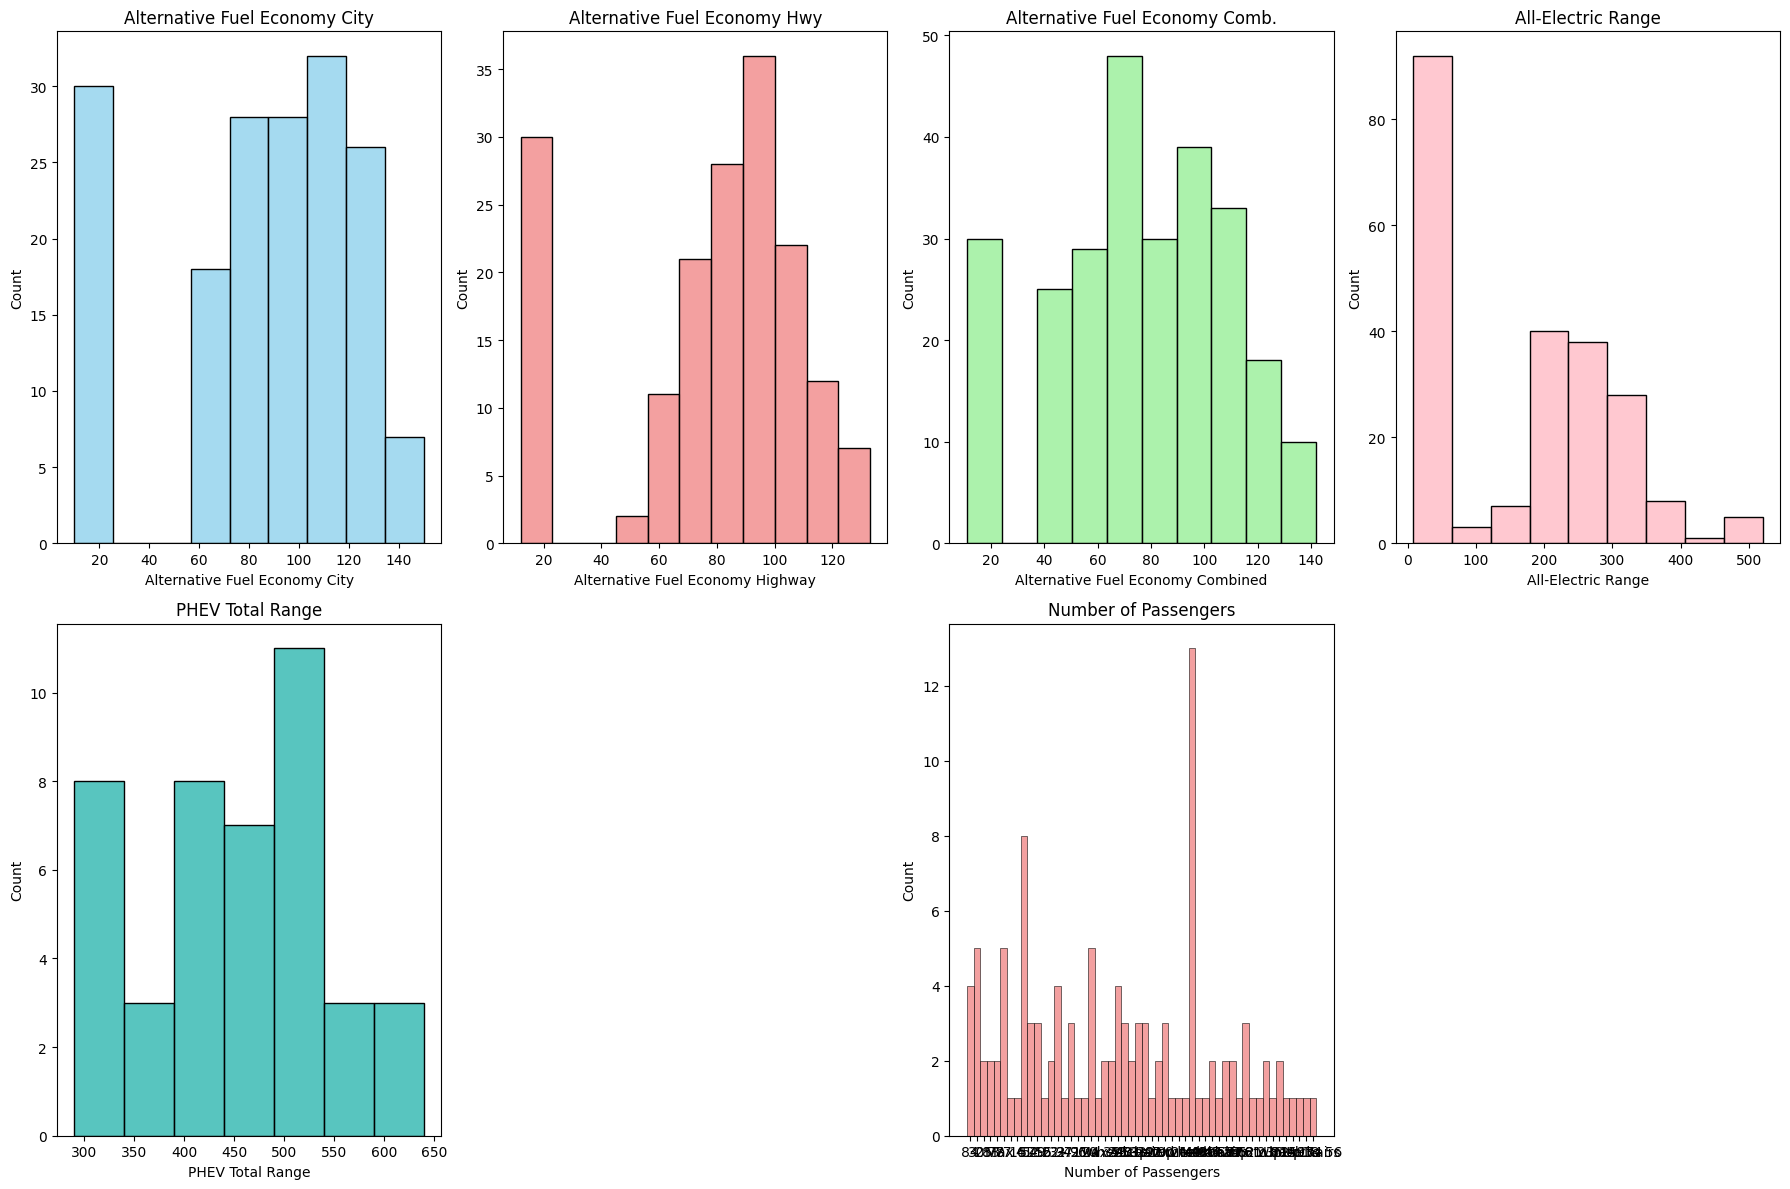

In [17]:
plt.figure(figsize=(18, 12))

# Histogram 1
plt.subplot(2, 4, 1)
sns.histplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy City', color='skyblue')
plt.title('Alternative Fuel Economy City')

# Histogram 2
plt.subplot(2, 4, 2)
sns.histplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy Highway', color='lightcoral')
plt.title('Alternative Fuel Economy Hwy')

# Histogram 3
plt.subplot(2, 4, 3)
sns.histplot(data=alternative_fuel_vehicles, x='Alternative Fuel Economy Combined', color='lightgreen')
plt.title('Alternative Fuel Economy Comb.')

# Histogram 4
plt.subplot(2, 4, 4)
sns.histplot(data=alternative_fuel_vehicles, x='All-Electric Range', color='lightpink')
plt.title('All-Electric Range')

# Histogram 5
plt.subplot(2, 4, 5)
sns.histplot(data=alternative_fuel_vehicles, x='PHEV Total Range', color='lightseagreen')
plt.title('PHEV Total Range')

# Histogram 6
#plt.subplot(2, 4, 6)
#sns.histplot(data=alternative_fuel_vehicles, x='Engine Size (L)', color='lightblue')
#plt.title('Engine Size')

# Histogram 7
plt.subplot(2, 4, 7)
sns.histplot(data=alternative_fuel_vehicles, x='Number of Passengers', color='lightcoral')
plt.title('Number of Passengers')

plt.tight_layout()
plt.show()

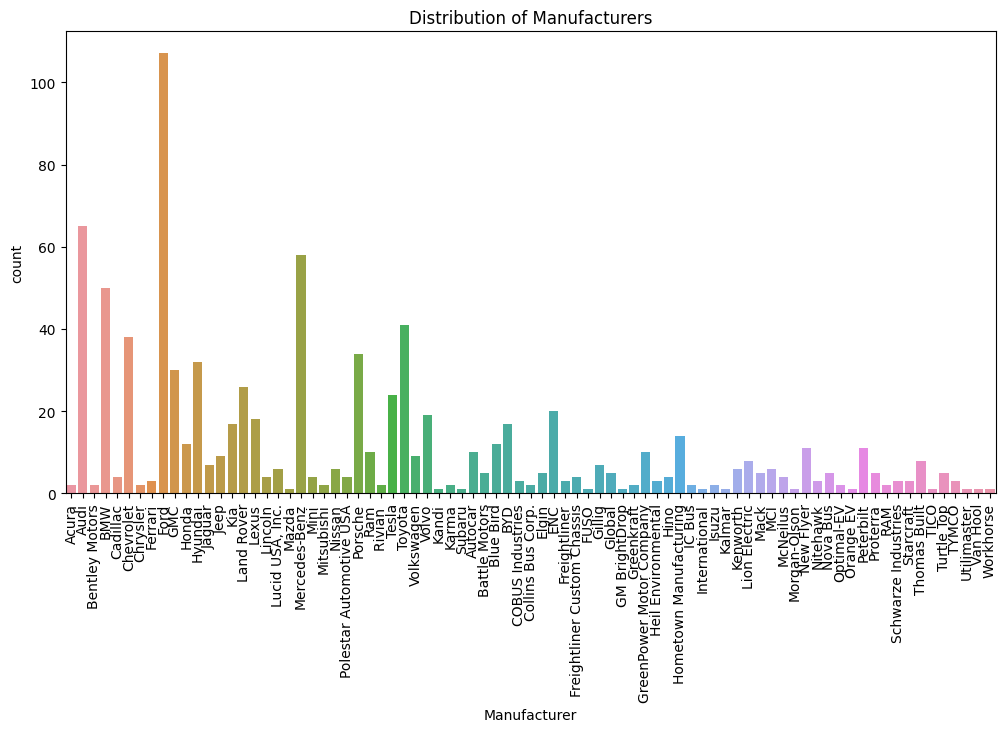

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=alternative_fuel_vehicles, x='Manufacturer')
plt.title('Distribution of Manufacturers')
plt.xticks(rotation=90)
plt.show()

## ELECTRIC AND ALTERNATIVE FUEL CHARGING STATIONS
### Electric and Alternative Fuel Charging Stations.csv

Importing the dataset as a DataFrame

In [19]:
charging_stations = pd.read_csv('Datasets\Electric and Alternative Fuel Charging Stations.csv')

In [20]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<b>Dataframe descripcion :</b> This dataset is a comprehensive collection of information about fueling and charging stations, particularly those that support alternative fuels and electric vehicles. This dataset provides valuable insights into the availability and details of these stations across different locations.

#### Data Dictionary

- **Fuel Type Code:** Type of fuel available at the station.
- **Station Name:** Name of the fuel station.
- **Street Address:** Address/location of the station.
- **Intersection Directions:** Directions or landmarks for finding the station, particularly at intersections.
- **City:** City where the fuel station is located.
- **State:** State in which the station is situated.
- **ZIP:** ZIP code for the station's address.
- **Plus4:** Additional ZIP code digits (if applicable).
- **Station Phone:** Contact phone number for the station.
- **Status Code:** Code indicating the status of the station.
- **Expected Date:** Anticipated date for station availability or updates.
- **Groups With Access Code:** Code indicating which groups have access to the station.
- **Access Days Time:** Information about the days and times the station is accessible.
- **Cards Accepted:** Types of payment cards accepted at the station.
- **BD Blends:** Information about the types of biodiesel (BD) blends available.
- **NG Fill Type Code:** Code representing the natural gas fill type.
- **NG PSI:** Pressure specifications for natural gas fueling.
- **EV Level1 EVSE Num:** Number of Level 1 Electric Vehicle Supply Equipment (EVSE) available.
- **EV Level2 EVSE Num:** Number of Level 2 Electric Vehicle Supply Equipment (EVSE) available.
- **EV DC Fast Count:** Count of DC fast chargers for electric vehicles.
- **EV Other Info:** Additional information about electric vehicle charging.
- **EV Network:** The network associated with electric vehicle charging.
- **EV Network Web:** Website for the electric vehicle charging network.
- **Geocode Status:** Status of the geographical coordinates (latitude and longitude).
- **Latitude:** Geographic latitude of the station.
- **Longitude:** Geographic longitude of the station.
- **Date Last Confirmed:** Date of the last confirmation or update.
- **ID:** A unique identifier for the station.
- **Updated At:** Timestamp for when the station's information was last updated.
- **Owner Type Code:** Code representing the owner type of the station.
- **Federal Agency ID:** Identifier for federal agency ownership.
- **Federal Agency Name:** Name of the federal agency (if applicable).
- **Open Date:** Date when the station was opened for operation.
- **Hydrogen Status Link:** Link to information about the status of hydrogen availability.
- **NG Vehicle Class:** Classifications for natural gas vehicles.
- **LPG Primary:** Information about primary propane (LPG) availability.
- **E85 Blender Pump:** Availability of E85 ethanol blender pumps.
- **EV Connector Types:** Types of connectors available for electric vehicle charging.
- **Country:** Country where the station is located.
- **Intersection Directions (French):** Directions or landmarks in the French language.
- **Access Days Time (French):** Information about access days and times in the French language.
- **BD Blends (French):** Information about biodiesel blends in the French language.
- **Groups With Access Code (French):** Access group codes in the French language.
- **Hydrogen Is Retail:** Indication of whether hydrogen is available for retail purchase.
- **Access Code:** Code specifying access conditions for the station.
- **Access Detail Code:** Code providing details about station access.
- **Federal Agency Code:** Code representing the federal agency (if applicable).
- **Facility Type:** Type of facility where the station is located.
- **CNG Dispenser Num:** Number of compressed natural gas (CNG) dispensers.
- **CNG On-Site Renewable Source:** Information about on-site renewable energy sources for CNG.
- **CNG Total Compression Capacity:** Total compression capacity for CNG.
- **CNG Storage Capacity:** Capacity for storing compressed natural gas (CNG).
- **LNG On-Site Renewable Source:** Information about on-site renewable energy sources for LNG.
- **E85 Other Ethanol Blends:** Availability of other ethanol blends aside from E85.
- **EV Pricing:** Pricing information for electric vehicle charging.
- **EV Pricing (French):** Pricing information in the French language.
- **LPG Nozzle Types:** Types of nozzles available for LPG.
- **Hydrogen Pressures:** Pressure specifications for hydrogen fueling.
- **Hydrogen Standards:** Standards related to hydrogen fueling.
- **CNG Fill Type Code:** Code representing the CNG fill type.
- **CNG PSI:** Pressure specifications for CNG fueling.
- **CNG Vehicle Class:** Classifications for CNG vehicles.
- **LNG Vehicle Class:** Classifications for LNG vehicles.
- **EV On-Site Renewable Source:** Information about on-site renewable energy sources for EV charging.
- **Restricted Access:** Indication of access restrictions at the station

In [21]:
charging_stations.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,32.367916,-86.267021,2022-06-14,17,2022-06-14 16:22:47 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,STANDALONE_STATION,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,NaN,Public - Card key at all times,24 hours daily,Comdata FleetOne FuelMan Voyager Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.745843,-84.398837,2021-08-04,42,2022-02-10 19:42:29 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,STANDALONE_STATION,1.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,NaN,Private - Government only,NaN,NaN,NaN,Q,3000,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.821911,-84.367461,2021-08-04,45,2022-02-10 19:42:29 UTC,LG,NaN,NaN,1996-12-15,NaN,LD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé - Réservé au gouvernement,NaN,private,GOVERNMENT,NaN,FLEET_GARAGE,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,33.760256,-84.543822,2022-06-14,64,2022-06-14 16:22:47 UTC,P,NaN,NaN,1997-01-01,NaN,HD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,STANDALONE_STATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,NaN,Fort Smith,AR,72903,NaN,479-783-3188,E,NaN,Public - Credit card at all times,24 hours daily,FuelMan M V Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,35.362213,-94.375338,2022-06-14,73,2022-06-14 16:22:47 UTC,T,NaN,NaN,1997-01-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,UTILITY,1.0,NONE,250.0,57855.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [22]:
charging_stations.tail()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
70401,ELEC,SCHLITZ PARK SCHLITZ PARK,1555 N River Center Dr,NaN,Milwaukee,WI,53212,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,43.050637,-87.910015,2022-07-25,224376,2022-07-25 00:58:13 UTC,NaN,NaN,NaN,2022-07-24,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70402,ELEC,NEXUS EAST STATION 2,720 Airport Blvd,NaN,Austin,TX,78702,NaN,888-758-4389,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,ChargePoint Network,http://www.chargepoint.com/,GPS,30.252438,-97.694427,2022-07-25,224377,2022-07-25 01:22:29 UTC,NaN,NaN,NaN,2022-07-24,NaN,NaN,NaN,NaN,J1772,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70403,ELEC,Raley's,6119 Horseshoe Bar Rd,NaN,Loomis,CA,95650,NaN,877-455-3833,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,eVgo Network,https://www.evgo.com/,GPS,38.817727,-121.188751,2022-07-25,224380,2022-07-25 01:30:43 UTC,NaN,NaN,NaN,2022-07-25,NaN,NaN,NaN,NaN,CHADEMO J1772COMBO,US,NaN,NaN,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70404,ELEC,13601 Glenoaks blvd,13601 Glenoaks blvd,NaN,Los Angeles,CA,91342,NaN,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,FLO,https://flo.ca/,GPS,34.318879,-118.464478,2022-07-25,224381,2022-07-25 01:48:14 UTC,NaN,NaN,NaN,2022-07-25,NaN,NaN,NaN,NaN,J1772,CA,NaN,Accessible 24 heures par jour,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70405,ELEC,6723 Van Nuys blvd,6723 Van Nuys Blvd,NaN,Los Angeles,CA,91405,NaN,888-356-8911,E,NaN,Public,24 hours daily,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,FLO,https://flo.ca/,GPS,34.192599,-118.448824,2022-07-25,224382,2022-07-25 01:48:14 UTC,NaN,NaN,NaN,2022-07-25,NaN,NaN,NaN,NaN,J1772,CA,NaN,Accessible 24 heures par jour,NaN,Public,NaN,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Shape and Dimension

In [23]:
charging_stations.shape

(70406, 65)

Number of Rows

In [24]:
num_rows = len(charging_stations)
print("\nNumber of Rows:", num_rows)


Number of Rows: 70406


Column Names and Data Types

In [25]:
column_info = charging_stations.dtypes
column_info

Fuel Type Code                       object
Station Name                         object
Street Address                       object
Intersection Directions              object
City                                 object
State                                object
ZIP                                  object
Plus4                               float64
Station Phone                        object
Status Code                          object
Expected Date                        object
Groups With Access Code              object
Access Days Time                     object
Cards Accepted                       object
BD Blends                            object
NG Fill Type Code                    object
NG PSI                               object
EV Level1 EVSE Num                  float64
EV Level2 EVSE Num                  float64
EV DC Fast Count                    float64
EV Other Info                        object
EV Network                           object
EV Network Web                  

Change Data Types

In [26]:
charging_stations['NG PSI'] = charging_stations['NG PSI'].str.replace(r'\D', '', regex=True).astype(float)

### Data Information

Unique Values

In [27]:
unique_values = charging_stations.nunique()
unique_values

Fuel Type Code                          7
Station Name                        62835
Street Address                      52295
Intersection Directions              4034
City                                 8278
State                                  65
ZIP                                 22182
Plus4                                   0
Station Phone                       17059
Status Code                             3
Expected Date                         145
Groups With Access Code                28
Access Days Time                     2552
Cards Accepted                        728
BD Blends                              33
NG Fill Type Code                       3
NG PSI                                  3
EV Level1 EVSE Num                     24
EV Level2 EVSE Num                     63
EV DC Fast Count                       32
EV Other Info                           9
EV Network                             34
EV Network Web                         32
Geocode Status                    

Duplicates

In [28]:
duplicates = charging_stations[charging_stations.duplicated()]
duplicates

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access


Missing and Null Values

In [29]:
missing_values = charging_stations.isnull().sum()
missing_values

Fuel Type Code                          0
Station Name                            0
Street Address                          1
Intersection Directions             65914
City                                    0
State                                   0
ZIP                                     1
Plus4                               70406
Station Phone                        5202
Status Code                             0
Expected Date                       69188
Groups With Access Code                 0
Access Days Time                     3778
Cards Accepted                      59117
BD Blends                           69189
NG Fill Type Code                   68803
NG PSI                              68987
EV Level1 EVSE Num                  70120
EV Level2 EVSE Num                  16262
EV DC Fast Count                    62099
EV Other Info                       70357
EV Network                           9499
EV Network Web                      20101
Geocode Status                    

### Summary Statistics

In [30]:
summary_stats = charging_stations.describe()
summary_stats

,Plus4,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,ID,Federal Agency ID,CNG Dispenser Num,CNG Total Compression Capacity,CNG Storage Capacity
count,0.0,1.419000e+03,286.000000,54144.000000,8307.000000,70406.000000,70406.000000,70406.000000,955.000000,1039.000000,708.000000,357.000000
mean,NaN,4.908437e+06,3.461538,2.315289,3.576381,38.929309,-96.061447,148730.326066,13.905759,2.731473,873.766949,47866.787115
std,NaN,1.109843e+07,6.548356,3.157387,4.129470,5.628458,19.545273,54261.672118,6.767439,8.333492,1032.371466,54327.698853
min,NaN,3.000000e+03,1.000000,1.000000,1.000000,0.000000,-159.788556,17.000000,2.000000,0.000000,2.000000,0.000000
25%,NaN,3.600000e+03,1.000000,2.000000,1.000000,34.182981,-117.860563,113723.250000,8.000000,1.000000,215.750000,30000.000000
50%,NaN,3.600000e+03,1.000000,2.000000,2.000000,39.105989,-92.002897,165247.500000,14.000000,2.000000,632.000000,36000.000000
75%,NaN,3.600000e+03,2.000000,2.000000,4.000000,42.702185,-78.881493,190653.750000,17.000000,2.000000,1100.000000,60000.000000
max,NaN,3.000360e+07,51.000000,311.000000,56.000000,64.852466,40.432278,224382.000000,60.000000,202.000000,10620.000000,593136.000000


Outliers

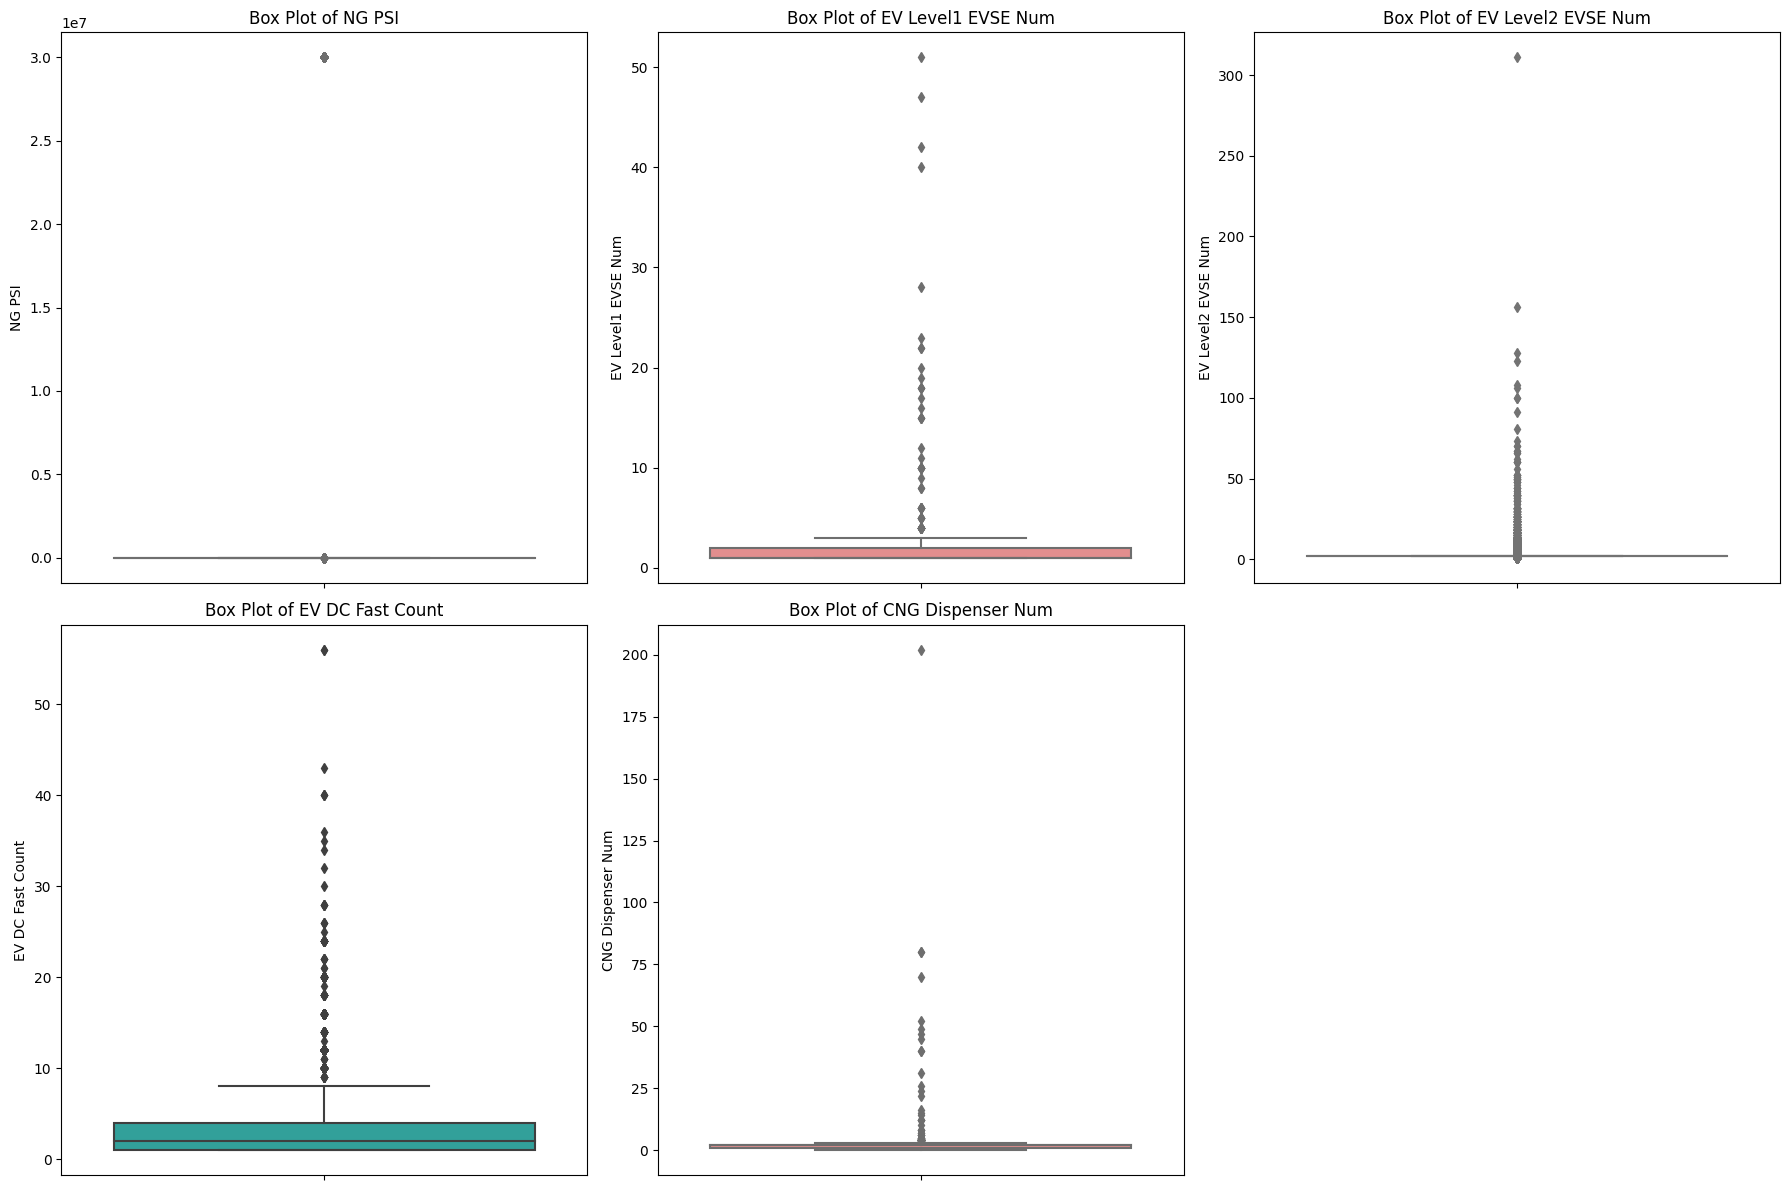

In [31]:
plt.figure(figsize=(18, 12))

# Boxplot 1
plt.subplot(2, 3, 1)
sns.boxplot(data=charging_stations, y='NG PSI', color='skyblue')
plt.title('Box Plot of NG PSI')

# Boxplot 2
plt.subplot(2, 3, 2)
sns.boxplot(data=charging_stations, y='EV Level1 EVSE Num', color='lightcoral')
plt.title('Box Plot of EV Level1 EVSE Num')

# Boxplot 3
plt.subplot(2, 3, 3)
sns.boxplot(data=charging_stations, y='EV Level2 EVSE Num', color='lightgreen')
plt.title('Box Plot of EV Level2 EVSE Num')

# Boxplot 4
plt.subplot(2, 3, 4)
sns.boxplot(data=charging_stations, y='EV DC Fast Count', color='lightseagreen')
plt.title('Box Plot of EV DC Fast Count')

# Boxplot 5
plt.subplot(2, 3, 5)
sns.boxplot(data=charging_stations, y='CNG Dispenser Num', color='lightcoral')
plt.title('Box Plot of CNG Dispenser Num')

plt.tight_layout()
plt.show()

Data Distribution

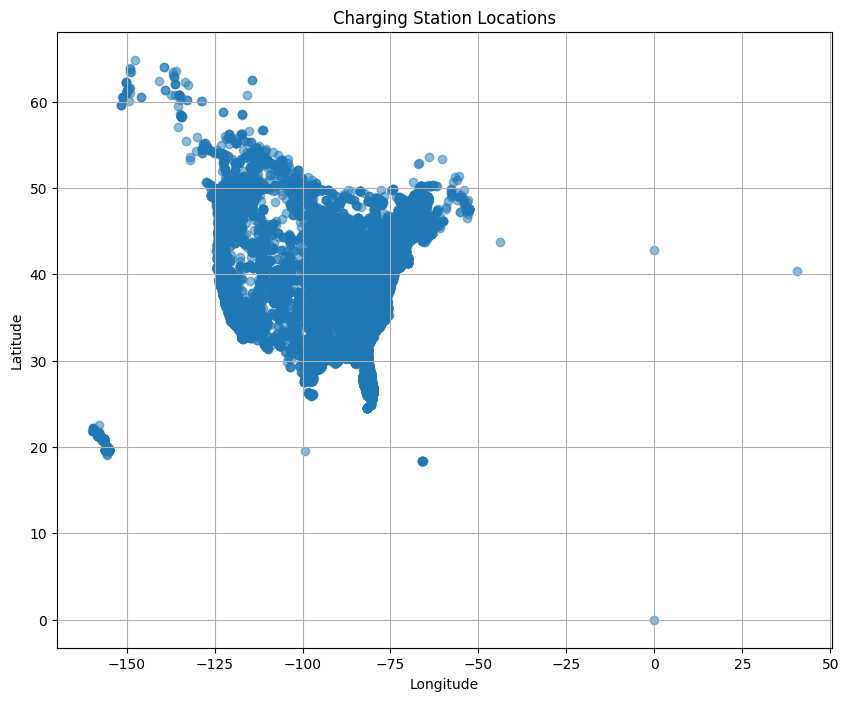

In [32]:
# Geospatial Analysis: Visualize charging station locations
plt.figure(figsize=(10, 8))
plt.scatter(charging_stations['Longitude'], charging_stations['Latitude'], alpha=0.5)
plt.title('Charging Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

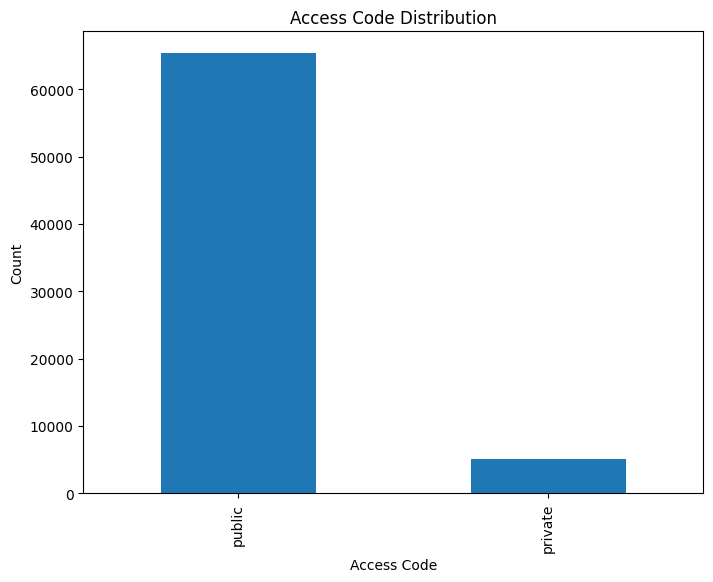

In [33]:
# Charging Station Access: Explore 'Access Days Time' and 'Access Code'
access_counts = charging_stations['Access Code'].value_counts()
plt.figure(figsize=(8, 6))
access_counts.plot(kind='bar')
plt.title('Access Code Distribution')
plt.xlabel('Access Code')
plt.ylabel('Count')
plt.show()

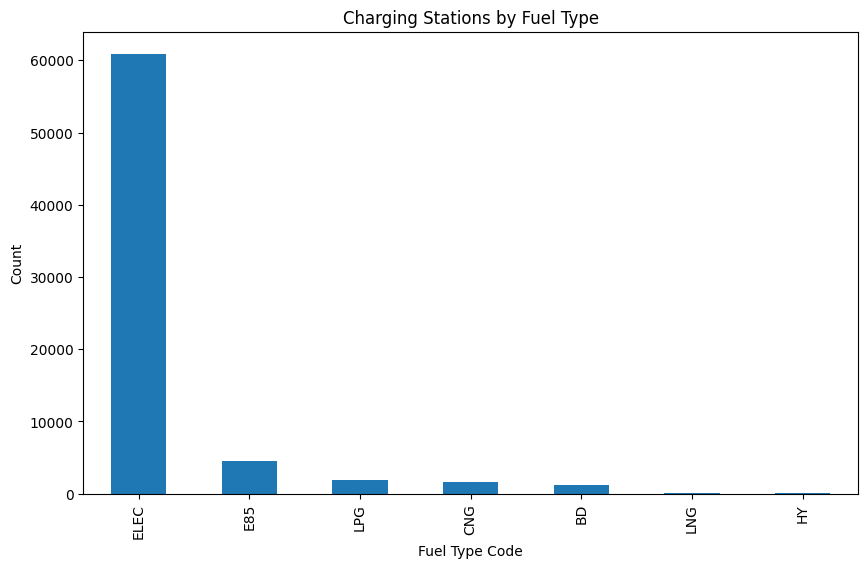

In [34]:
# Fuel Types: Explore the distribution of charging stations by 'Fuel Type Code'
fuel_type_counts = charging_stations['Fuel Type Code'].value_counts()
plt.figure(figsize=(10, 6))
fuel_type_counts.plot(kind='bar')
plt.title('Charging Stations by Fuel Type')
plt.xlabel('Fuel Type Code')
plt.ylabel('Count')
plt.show()

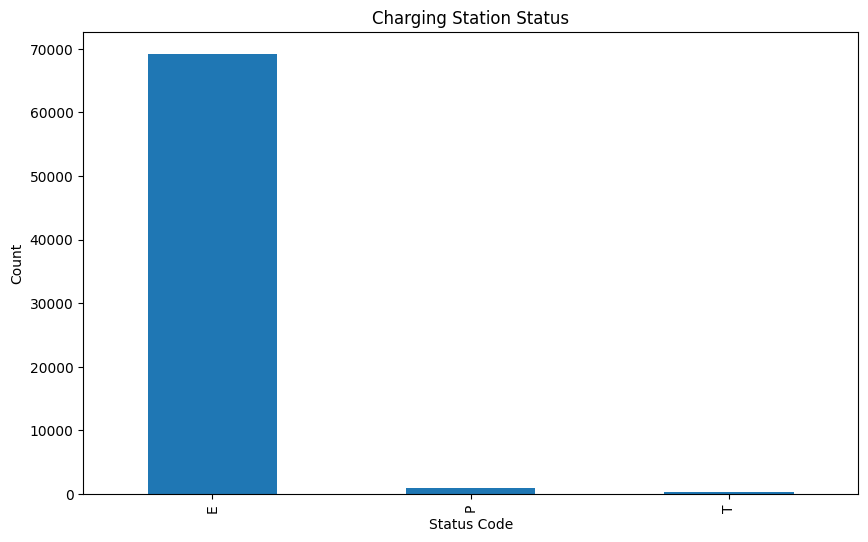

In [35]:
# Investigate station status using 'Status Code'
status_counts = charging_stations['Status Code'].value_counts()
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar')
plt.title('Charging Station Status')
plt.xlabel('Status Code')
plt.ylabel('Count')
plt.show()

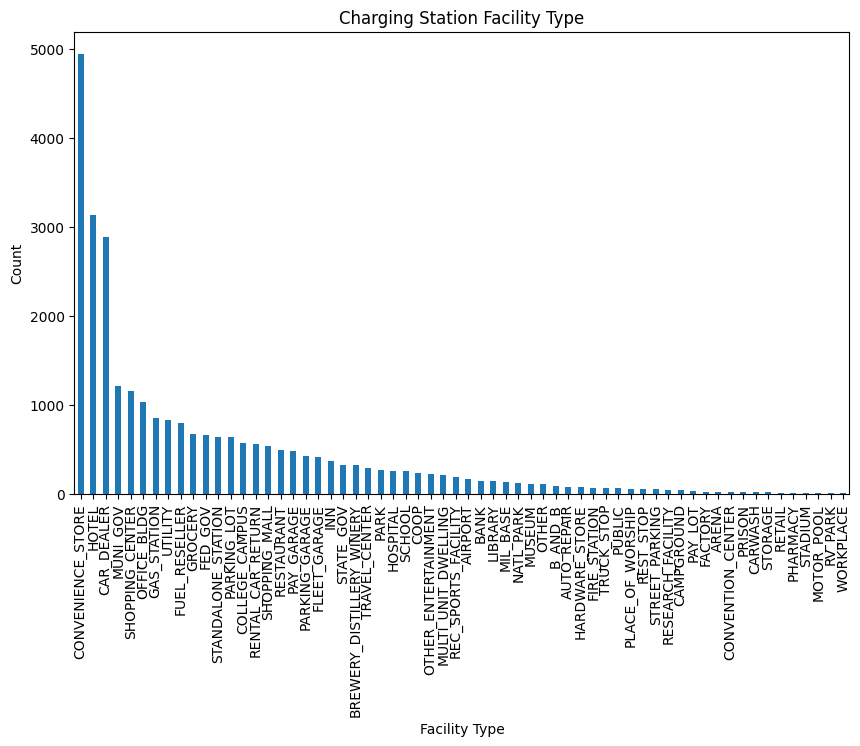

In [36]:
# Explore 'Facility Type' distribution
facility_type_counts = charging_stations['Facility Type'].value_counts()
plt.figure(figsize=(10, 6))
facility_type_counts.plot(kind='bar')
plt.title('Charging Station Facility Type')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.show()